# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/03_cross_and_outer_products`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/03_cross_and_outer_products/01_introduction.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Cross Products and Outer Products

This notebook introduces two important vector and matrix operations that build on our previous examples:

1. **Cross Products**: An operation on vectors in 3D space that results in a vector perpendicular to both input vectors
2. **Outer Products**: A generalization of matrix multiplication that creates a matrix from two vectors

Both operations are fundamental in linear algebra with wide-ranging applications in physics, computer graphics, machine learning, and more.


## Cross Product - Definition and Intuition

The **cross product** is a binary operation on two vectors in 3D space. It produces a third vector that is:
- Perpendicular (orthogonal) to both input vectors
- Has a magnitude equal to the area of the parallelogram defined by the two input vectors
- Direction determined by the right-hand rule

Mathematically, for two vectors $\mathbf{a} = [a_1, a_2, a_3]$ and $\mathbf{b} = [b_1, b_2, b_3]$, the cross product $\mathbf{a} \times \mathbf{b}$ is:

$$\mathbf{a} \times \mathbf{b} = 
\begin{bmatrix} 
a_2b_3 - a_3b_2 \\ 
a_3b_1 - a_1b_3 \\ 
a_1b_2 - a_2b_1
\end{bmatrix}$$

Let's implement this and visualize it:


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Custom 3D arrow for better visualization
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Define the cross product function
def cross_product(a, b):
    """
    Compute the cross product of two 3D vectors.
    
    Args:
        a (torch.Tensor): First vector of shape (3,)
        b (torch.Tensor): Second vector of shape (3,)
        
    Returns:
        torch.Tensor: Cross product vector of shape (3,)
    """
    return torch.tensor([
        a[1] * b[2] - a[2] * b[1],
        a[2] * b[0] - a[0] * b[2],
        a[0] * b[1] - a[1] * b[0]
    ])

# Example vectors
a = torch.tensor([2.0, 0.0, 0.0])  # Vector along x-axis
b = torch.tensor([0.0, 3.0, 0.0])  # Vector along y-axis

# Compute cross product
c = cross_product(a, b)

print(f"Vector a: {a}")
print(f"Vector b: {b}")
print(f"a × b: {c}")
print(f"Magnitude of a × b: {torch.norm(c)}")
print(f"Area of parallelogram: {torch.norm(a) * torch.norm(b) * torch.sin(torch.tensor(np.pi/2))}")


Vector a: tensor([2., 0., 0.])
Vector b: tensor([0., 3., 0.])
a × b: tensor([0., 0., 6.])
Magnitude of a × b: 6.0
Area of parallelogram: 6.0


### Visualizing the Cross Product

Let's create a 3D visualization to better understand the cross product:


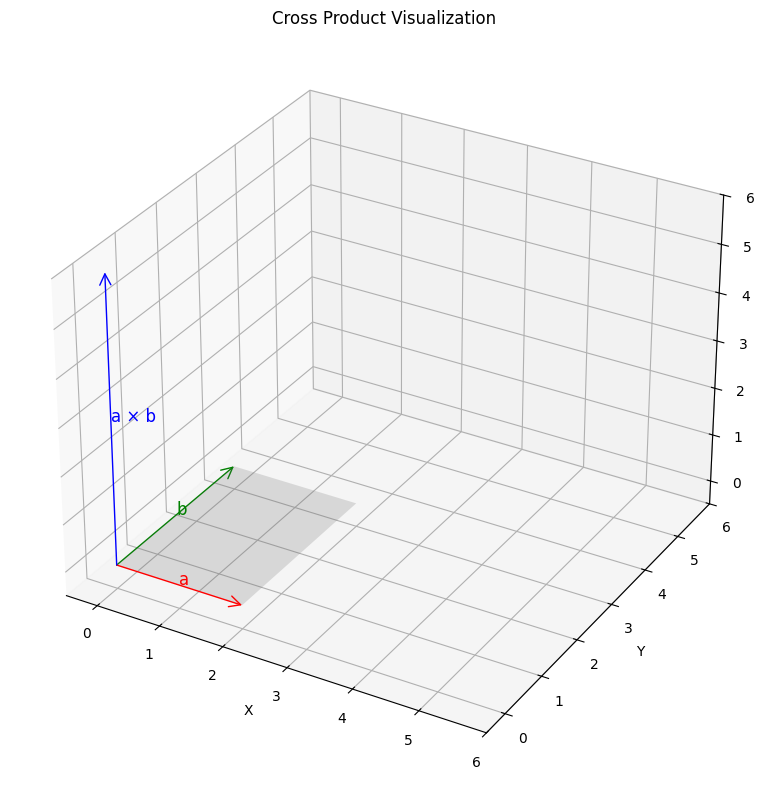

In [2]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Origin
origin = torch.zeros(3)

# Convert tensors to numpy for plotting
a_np = a.numpy()
b_np = b.numpy()
c_np = c.numpy()
o_np = origin.numpy()

# Create arrows for the vectors
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='->', shrinkA=0, shrinkB=0)

a_arrow = Arrow3D([o_np[0], a_np[0]], 
                 [o_np[1], a_np[1]], 
                 [o_np[2], a_np[2]], 
                 **arrow_prop_dict, color='r')

b_arrow = Arrow3D([o_np[0], b_np[0]], 
                 [o_np[1], b_np[1]], 
                 [o_np[2], b_np[2]], 
                 **arrow_prop_dict, color='g')

c_arrow = Arrow3D([o_np[0], c_np[0]], 
                 [o_np[1], c_np[1]], 
                 [o_np[2], c_np[2]], 
                 **arrow_prop_dict, color='b')

# Add arrows to plot
ax.add_artist(a_arrow)
ax.add_artist(b_arrow)
ax.add_artist(c_arrow)

# Add parallelogram formed by the vectors
xx, yy = np.meshgrid([0, a_np[0]], [0, b_np[1]])
z = np.zeros_like(xx)
ax.plot_surface(xx, yy, z, alpha=0.2, color='gray')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cross Product Visualization')

# Add vector labels
ax.text(a_np[0]/2, a_np[1]/2, a_np[2]/2, "a", color='r', fontsize=12)
ax.text(b_np[0]/2, b_np[1]/2, b_np[2]/2, "b", color='g', fontsize=12)
ax.text(c_np[0]/2, c_np[1]/2, c_np[2]/2, "a × b", color='b', fontsize=12)

# Set axis limits
max_val = max(np.max(np.abs(a_np)), np.max(np.abs(b_np)), np.max(np.abs(c_np)))
ax.set_xlim([-0.5, max(a_np[0], max_val)])
ax.set_ylim([-0.5, max(b_np[1], max_val)])
ax.set_zlim([-0.5, max(c_np[2], max_val)])

plt.tight_layout()
plt.show()


## Properties of the Cross Product

The cross product has several important properties:

1. **Anticommutativity**: $\mathbf{a} \times \mathbf{b} = -(\mathbf{b} \times \mathbf{a})$
2. **Distributivity over addition**: $\mathbf{a} \times (\mathbf{b} + \mathbf{c}) = \mathbf{a} \times \mathbf{b} + \mathbf{a} \times \mathbf{c}$
3. **Scalar multiplication**: $(\lambda\mathbf{a}) \times \mathbf{b} = \lambda(\mathbf{a} \times \mathbf{b}) = \mathbf{a} \times (\lambda\mathbf{b})$
4. **Perpendicularity**: $\mathbf{a} \times \mathbf{b}$ is perpendicular to both $\mathbf{a}$ and $\mathbf{b}$

Let's verify some of these properties:


In [3]:
# Define another set of vectors for verification
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])
c = torch.tensor([7.0, 8.0, 9.0])

# Anticommutativity: a × b = -(b × a)
a_cross_b = cross_product(a, b)
b_cross_a = cross_product(b, a)

print("Anticommutativity:")
print(f"a × b = {a_cross_b}")
print(f"-(b × a) = {-b_cross_a}")
print(f"Equal? {torch.allclose(a_cross_b, -b_cross_a)}")
print()

# Distributivity: a × (b + c) = a × b + a × c
b_plus_c = b + c
a_cross_bc = cross_product(a, b_plus_c)
a_cross_b_plus_a_cross_c = cross_product(a, b) + cross_product(a, c)

print("Distributivity:")
print(f"a × (b + c) = {a_cross_bc}")
print(f"a × b + a × c = {a_cross_b_plus_a_cross_c}")
print(f"Equal? {torch.allclose(a_cross_bc, a_cross_b_plus_a_cross_c)}")
print()

# Scalar multiplication: (λa) × b = λ(a × b)
lambda_val = 2.5
lambda_a = lambda_val * a
lambda_a_cross_b = cross_product(lambda_a, b)
lambda_times_a_cross_b = lambda_val * cross_product(a, b)

print("Scalar multiplication:")
print(f"(λa) × b = {lambda_a_cross_b}")
print(f"λ(a × b) = {lambda_times_a_cross_b}")
print(f"Equal? {torch.allclose(lambda_a_cross_b, lambda_times_a_cross_b)}")
print()

# Perpendicularity: a × b is perpendicular to both a and b
a_cross_b = cross_product(a, b)
dot_a_axb = torch.dot(a, a_cross_b)
dot_b_axb = torch.dot(b, a_cross_b)

print("Perpendicularity:")
print(f"a · (a × b) = {dot_a_axb}")
print(f"b · (a × b) = {dot_b_axb}")
print(f"Is a × b perpendicular to a? {torch.isclose(dot_a_axb, torch.tensor(0.0))}")
print(f"Is a × b perpendicular to b? {torch.isclose(dot_b_axb, torch.tensor(0.0))}")

Anticommutativity:
a × b = tensor([-3.,  6., -3.])
-(b × a) = tensor([-3.,  6., -3.])
Equal? True

Distributivity:
a × (b + c) = tensor([-9., 18., -9.])
a × b + a × c = tensor([-9., 18., -9.])
Equal? True

Scalar multiplication:
(λa) × b = tensor([-7.5000, 15.0000, -7.5000])
λ(a × b) = tensor([-7.5000, 15.0000, -7.5000])
Equal? True

Perpendicularity:
a · (a × b) = 0.0
b · (a × b) = 0.0
Is a × b perpendicular to a? True
Is a × b perpendicular to b? True
